<a href="https://colab.research.google.com/github/seraffin/FailOmen/blob/master/Wojtek/workingNN_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow as tf
import numpy as np
import pandas as pd
import keras

# Helper libraries
import matplotlib.pyplot as plt

Using TensorFlow backend.


**Utilities:**

In [0]:
def searchForFailed(yList):
  changedRowList = []
  for row in range (len(yList)):
    if 0 in yList[row]:
      changedRowList.append(row)
  return changedRowList

def returnFailedData(xList, yList, changedRowList):
  xFailed = []
  yFailed = []
  
  for row in changedRowList:
    xFailed.append(xList[row])
    yFailed.append(yList[row])
  xFailed = np.array(xFailed)
  yFailed = np.array(yFailed)
  return xFailed, yFailed



In [0]:
def count_distribution(prediction):
  #Distributions of argmins through all the predictions
  i = 1
  tab = [0] * 542
  for a in predictions:
    j = 0
    for b in a:
      if b < 1.0 : j = j + 1

    #print (i, '. ', j, np.argmin(a))
    tab[np.argmin(a)] += 1
    i = i + 1

  i = 0
  distributed_array = []
  for a in tab:
    if a > 0 : 
      #print ('position', i, '\targmin count', a)
      distributed_array.append((i,a))
    i += 1
  create_plot(distributed_array)  
  return distributed_array


In [0]:
def create_plot(x_data, y_data=0):
  import matplotlib.pyplot as plt
  if y_data == 0:  
    unzip = list(zip(*x_data))
    x_data, y_data = unzip[0],unzip[1]
  plt.bar(x_data, y_data,width=10)
  plt.xlabel("test no")
  plt.ylabel("how many times test was predicted as the best to use")
  plt.show()

In [0]:
def failsCount():
  fala = 0
  for i, a in enumerate(yTest):
    j = 0
    for k, b in enumerate(a):
      if b < 1.0 : j += 1

    if j > 0 : 
      print (i, '. ', j)
    i = i + 1
    fala += j
  print (fala)

In [0]:
# Evaluation function

def evaluation(additionalPredictions, refYsupervisor):
  
  lenght = len(refYsupervisor)

  failPositions = [[] for y in range(lenght)]

  for i, a in enumerate(refYsupervisor):

    for j, b in enumerate(a):
      if b == 0 : failPositions[i].append(j);

  predictionsTemp = predictions.copy()
  predictionPositions = [[] for y in range(lenght)]


  for i, a in enumerate(predictionsTemp):

    if len(failPositions[i]) != 0:
      for j in range(len(failPositions[i]) + additionalPredictions):
        argmin = np.argmin(a)
        predictionPositions[i].append(argmin)
        predictionsTemp[i][argmin] = 1

  predictionHits = [[] for y in range(lenght)]

  for i, a in enumerate(failPositions):
    count = 0
    for j, b in enumerate(a):


      for c in predictionPositions[i]:
  #      predictionHits[i].append(predictions[i][c].copy())
  #      print(predictions[i][c])
  #      print(predictions[i][c])
  #      print (b, c)
        if c == b : count += 1

    if len(failPositions) != 0:
      predictionHits[i].insert(0,count)


  failsCount = 0
  hitsCount = 0
  for i, a in enumerate(refYsupervisor):
    j = 0

    for k, b in enumerate(a):
      if b < 1.0 : j += 1

  #  if j > 0 :
  #    print (i, '.', j, predictionHits[i])


    failsCount += j
    hitsCount += predictionHits[i][0]
    
  percFailsPredicted = hitsCount / failsCount * 100
  print('Percentage of fails predicted', hitsCount / failsCount * 100, '%')
  return percFailsPredicted

**Check if runtime is on GPU:**

In [19]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


**Import dataset:**

In [21]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dataToML_newConcept.csv to dataToML_newConcept.csv
User uploaded file "dataToML_newConcept.csv" with length 234154858 bytes


In [22]:
!ls

dataToML_newConcept.csv  sample_data


In [23]:
#Importing dataset
dataset = pd.read_csv('dataToML_newConcept.csv', index_col=False)

#Check the first 5 rows of the dataset. 
dataset.head(5)

,1,2,3,4,5,6,7,8,9,10,...,24272,24273,24274,24275,24276,24277,24278,24279,24280,24281
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [0]:
!ls

convertDataToML.csv  sample_data


**Assign values for building Neural Network:**

In [0]:
x = dataset.iloc[:, 0:23739].values
y = dataset.iloc[:, 23739:24281].values

In [25]:
print(len(x))
print(len(y))

4818
4818


**(Optional) Reduce data just to this with included failed test:**

In [0]:
xReduced, yReduced = returnFailedData(x, y, searchForFailed(y))

In [27]:
print(len(xReduced))
print(len(yReduced))

712
712


**Split valuses to Test/Train:**

test_size = 0.2   -->  Train = 80% / Test = 20%

In [0]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(xReduced, yReduced, test_size = 0.2)


**Defining Neural Network:**

In [0]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

# Adding the input layer and the output layer
model.add(Dense(units = 542, activation="sigmoid", input_dim=23739, kernel_initializer="uniform")) # TRY smaller input_dim value or less neurons

**Running Builded NN:**

In [44]:
model.compile(optimizer = tf.train.MomentumOptimizer(learning_rate = 0.01, momentum = 0.4), loss = 'binary_crossentropy', metrics = ['accuracy'])
 
model.fit(xTrain, yTrain, batch_size = 10, epochs = 2)

Epoch 1/2
569/569 [==============================] - 1s 2ms/step - loss: 0.6728 - acc: 0.6999
Epoch 2/2
569/569 [==============================] - 1s 1ms/step - loss: 0.6722 - acc: 0.7042


In [62]:
predictionArray = []
for i in range(1, 5):
  pBatchSize = 10
  pEpochs = 2
  pLearningRate = 0.01 + float("0.0{}".format(i))
  pMomentum = 0.01 + float("0.0{}".format(i))
  print (pLearningRate)
  print(pMomentum)
  
  model = Sequential()

  
  
  # Adding the input layer and the first hidden layer
  model.add(Dense(6070, activation="sigmoid", input_dim=23739, kernel_initializer="uniform")) # TRY smaller input_dim value or less neurons
  # Adding the second hidden layer
  model.add(Dense(2000 * i, activation = "sigmoid", kernel_initializer="uniform"))
  # Adding the output layer
  model.add(Dense(542, activation="sigmoid", kernel_initializer="uniform"))
  
  
  model.compile(optimizer = tf.train.MomentumOptimizer(learning_rate = pLearningRate, momentum = pMomentum), loss = 'binary_crossentropy', metrics = ['accuracy'])
  model.fit(xTrain, yTrain, batch_size = pBatchSize, epochs = pEpochs)
  
  predictions = model.predict(xReduced)
  
  predictionArray.append(evaluation(15, yReduced))
  print("\n ----------------------------------------------------------\n")

0.02
0.02
Epoch 1/2


ResourceExhaustedError: ignored

In [60]:
for i in range(1, 4):
  print(i)

1
2
3


In [50]:
print(predictionArray)

[2.4432809773123907, 2.4432809773123907, 2.4432809773123907, 2.4432809773123907]


**Check network correctness:**

In [58]:
lossTest, accTest = model.evaluate(xTest, yTest)

print('Test accuracy:', accTest)
print('Test loss:', lossTest)


143/143 [==============================] - 0s 2ms/step
Test accuracy: 0.8423476802719223
Test loss: 0.6464445245015872


In [0]:

#choose one

# predictions = model.predict(xTest)
predictions = model.predict(xReduced)

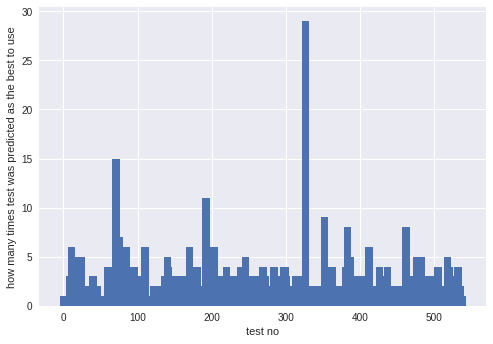

In [56]:
#Distributions of argmins through all the predictions
distribution_array = count_distribution(predictions)



In [57]:
evaluation(15, yReduced)

Percentage of fails predicted 3.5776614310645725 %


3.5776614310645725